# **Diferencias Finitas de Segundo Grado - Método Implícito**

## **Planteamiento del Problema**
La distribución del potencial eléctrico \(V\) de una barra de varias aleaciones metálicas de 1 metro de longitud está dada por la ecuación diferencial:

\[
\frac{d^2V}{dx^2} + 2\frac{dV}{dx} - 0.5(V_0 - V) = 0
\]

con las condiciones de frontera:

- \(V(0) = 50\)
- \(V(1) = 0\)
- \(V_0 = 10\)

Se desea determinar la distribución del potencial eléctrico utilizando el método de diferencias finitas con mallados de \(N = 10, 50, 100, 500\).

## **Metodología: Diferencias Finitas**
Para resolver la ecuación diferencial, se discretiza el dominio en \(N\) puntos y se aproximan las derivadas mediante diferencias finitas:

- **Segunda derivada** (diferencias centrales):
  $$
  \frac{d^2V}{dx^2} \approx \frac{V_{i+1} - 2V_i + V_{i-1}}{h^2}
  $$

- **Primera derivada** (diferencias centradas):
  $$
  \frac{dV}{dx} \approx \frac{V_{i+1} - V_{i-1}}{2h}
  $$

Donde $$h = \frac{1}{N+1}$$ es el tamaño del paso.

Al sustituir estas aproximaciones en la ecuación diferencial original, obtenemos un sistema de ecuaciones lineales de la forma:

$$
A \mathbf{V} = \mathbf{b}
$$

que se resuelve numéricamente para encontrar los valores de \(V\) en cada punto de la barra.

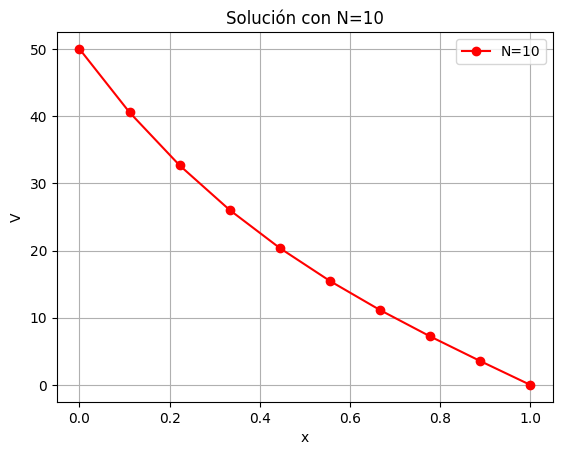

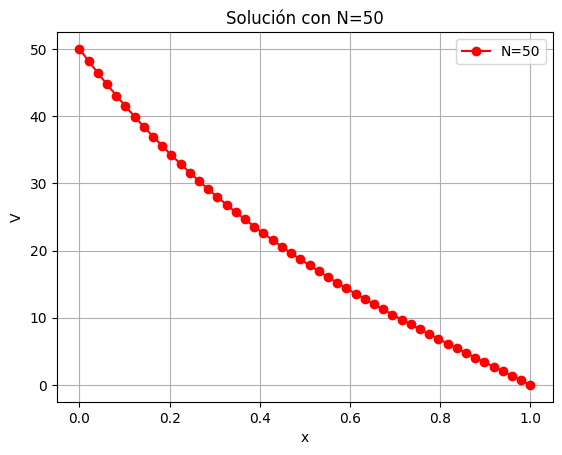

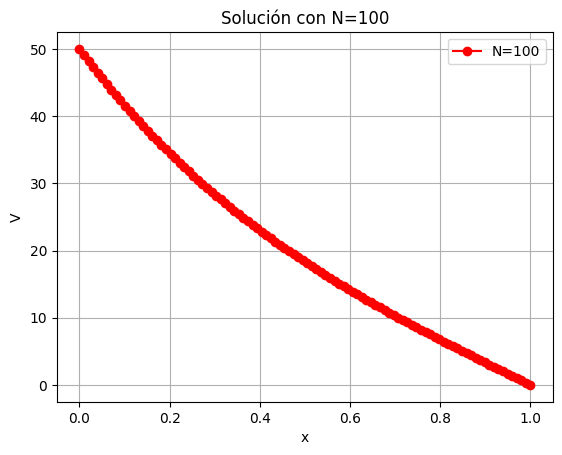

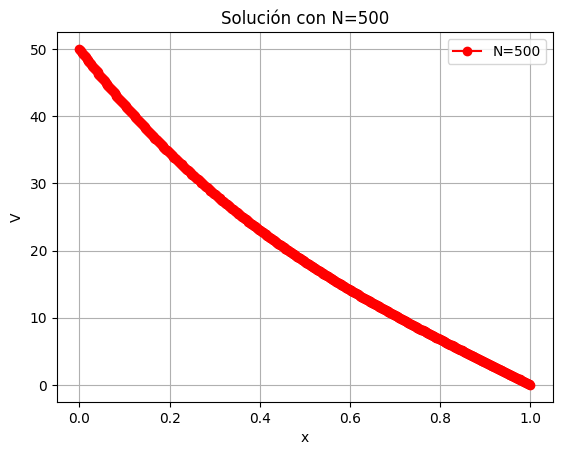

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def diferencias_finitas(N):
    # Parámetros del problema
    L = 1.0  # Longitud de la barra
    V0 = 10  # Parámetro dado en la ecuación
    V_left = 50  # Condición de frontera en x=0
    V_right = 0  # Condición de frontera en x=1
    
    # Discretización del dominio
    x = np.linspace(0, L, N)
    h = x[1] - x[0]  # Paso
    
    # Matriz y vector del sistema lineal
    A = np.zeros((N, N))
    b = np.zeros(N)
    
    # Llenar el sistema de ecuaciones
    for i in range(1, N-1):
        A[i, i-1] = 1 / h**2 - 1  # Coeficiente a la izquierda
        A[i, i] = -2 / h**2 - 2  # Coeficiente central
        A[i, i+1] = 1 / h**2  # Coeficiente a la derecha
        b[i] = -0.5 * V0
    
    # Aplicar condiciones de frontera
    A[0, 0] = 1
    b[0] = V_left
    A[-1, -1] = 1
    b[-1] = V_right
    
    # Resolver el sistema de ecuaciones
    V = np.linalg.solve(A, b)
    
    # Graficar la solución
    plt.figure()
    plt.plot(x, V, 'ro-', label=f'N={N}')
    plt.xlabel('x')
    plt.ylabel('V')
    plt.legend()
    plt.title(f'Solución con N={N}')
    plt.grid()
    plt.show()

# Resolver y graficar para diferentes valores de N
diferencias_finitas(10)
diferencias_finitas(50)
diferencias_finitas(100)
diferencias_finitas(500)